In [23]:
!pip -q install torchxrayvision

In [24]:
import skimage, torch, torchvision
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

import torch
import torchxrayvision as xrv
from torch import Tensor
from torch import nn
from random import shuffle
import cv2
# from google.colab.patches import cv2_imshow
import torchvision
import pandas as pd                     


import time
from torch import optim
import torch
from torch import nn
from torch import optim
from torch.cuda import amp
from torch.optim import lr_scheduler
from torch.optim.swa_utils import AveragedModel
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, models, transforms

import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.utils.data as td
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from matplotlib import image
from matplotlib import pyplot


In [25]:
!git clone https://github.com/ieee8023/covid-chestxray-dataset

fatal: destination path 'covid-chestxray-dataset' already exists and is not an empty directory.


In [26]:
d = xrv.datasets.COVID19_Dataset(imgpath="covid-chestxray-dataset/images/",csvpath="covid-chestxray-dataset/metadata.csv")

In [27]:
import matplotlib.pyplot as plt

In [28]:
sample = d[12]

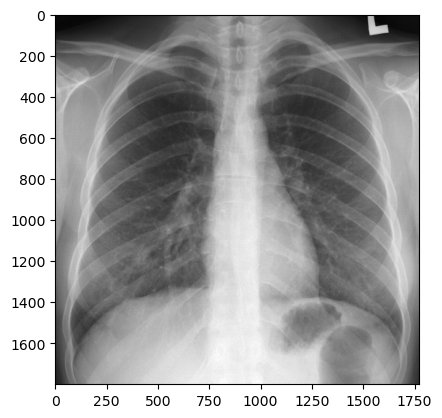

In [29]:
plt.imshow(sample["img"][0], cmap="gray");

In [30]:
import pandas as pd
pd.Series(dict(zip(d.pathologies,sample["lab"])))

Aspergillosis     0.0
Aspiration        0.0
Bacterial         0.0
COVID-19          0.0
Chlamydophila     0.0
Fungal            0.0
H1N1              0.0
Herpes            0.0
Influenza         0.0
Klebsiella        0.0
Legionella        0.0
Lipoid            0.0
MERS-CoV          0.0
MRSA              0.0
Mycoplasma        0.0
No Finding        0.0
Nocardia          0.0
Pneumocystis      0.0
Pneumonia         1.0
SARS              1.0
Staphylococcus    0.0
Streptococcus     0.0
Tuberculosis      0.0
Varicella         0.0
Viral             1.0
dtype: float32

In [31]:
d.csv.iloc[0]

index                                                                     0
patientid                                                                 2
offset                                                                  0.0
sex                                                                       M
age                                                                    65.0
finding                                            Pneumonia/Viral/COVID-19
RT_PCR_positive                                                           Y
survival                                                                  Y
intubated                                                                 N
intubation_present                                                        N
went_icu                                                                  N
in_icu                                                                    N
needed_supplemental_O2                                                    Y
extubated   

In [32]:
d.pathologies,sample["lab"]

(['Aspergillosis',
  'Aspiration',
  'Bacterial',
  'COVID-19',
  'Chlamydophila',
  'Fungal',
  'H1N1',
  'Herpes ',
  'Influenza',
  'Klebsiella',
  'Legionella',
  'Lipoid',
  'MERS-CoV',
  'MRSA',
  'Mycoplasma',
  'No Finding',
  'Nocardia',
  'Pneumocystis',
  'Pneumonia',
  'SARS',
  'Staphylococcus',
  'Streptococcus',
  'Tuberculosis',
  'Varicella',
  'Viral'],
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 0., 0., 0., 0., 1.], dtype=float32))

In [33]:
import torch
import cv2
import numpy as np
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from PIL import Image

In [34]:
class ImageDataset(Dataset):
    def __init__(self, csv, train, test):
        self.csv = csv
        self.train = train
        self.test = test
        self.csv = self.csv.drop_duplicates(subset=['filename'])
        self.all_image_names = self.csv[:]['filename']
        self.all_labels = np.array(['Aspergillosis', 'Aspiration', 'Bacterial', 'COVID-19', 'Chlamydophila' , 'Fungal', 'H1N1', 'Herpes', 'Influenza', 'Klebsiella', 'Legionella', 'Lipoid', 'MERS-CoV', 'MRSA', 'Mycoplasma', 'No Finding', 'Nocardia', 'Pneumocystis', 'Pneumonia', 'SARS', 'Staphylococcus', 'Streptococcus', 'Tuberculosis', 'Varicella', 'Viral'])
        self.df = np.array(self.csv[['filename','finding']])
        self.train_ratio = int(0.85 * len(self.csv))
        self.valid_ratio = len(self.csv) - self.train_ratio
        dictlables = {'Aspergillosis': 1, 
        'Aspiration':  2 , 
        'Bacterial':   3, 
        'COVID-19':  4, 
        'Chlamydophila': 5, 
        'Fungal' :   6, 
        'H1N1' :   7, 
        'Herpes ' :   8, 
        'Influenza' :   9 , 
        'Klebsiella' :   10, 
        'Legionella' :   11, 
        'Lipoid' :   12 , 
        'MERS-CoV'  : 13, 
        'MRSA' :   14, 
        'Mycoplasma' :   15, 
        'No Finding' :  16, 
        'Nocardia' :   17, 
        'Pneumocystis' :   18, 
        'Pneumonia' :   19, 
        'SARS' :   20, 
        'Staphylococcus' : 21, 
        'Streptococcus' :   22, 
        'Tuberculosis' :   23, 
        'Varicella' :   24, 
        'Viral' : 25,
        'E.Coli':26, 
        'Unknown': 16,
        'todo':16,
         } 
        # set the training data images and labels
        self.transform = transforms.Compose([
                transforms.ToPILImage(),
                transforms.Resize((227, 227)),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])

            ])
        if self.train == True:
            print(f"Number of training images: {self.train_ratio}")
            self.image_names = list(self.all_image_names[:self.train_ratio])

            self.labels = list(self.df[:self.train_ratio][:,1])
            self.labels = list(np.char.split(self.labels,sep ='/'))
            for idx,x in enumerate(self.labels):
              if len(x) == 0:
                x = ['Unknown']
              for i in range(3 - len(x)):
                x.append('Unknown')
              
              for idy,y in enumerate(x):
                self.labels[idx][idy] = dictlables[y]
              
              self.labels[idx] = self.labels[idx][0:3]
              
                
            print(self.labels)
        # set the validation data images and labels
        elif self.train == False and self.test == False:
            print(f"Number of validation images: {self.valid_ratio}")
            self.image_names = list(self.all_image_names[-self.valid_ratio:-10])
            self.labels = list(self.df[-self.valid_ratio:][:,1])
            self.labels = list(np.char.split(self.labels,sep ='/'))


            for idx,x in enumerate(self.labels):
              if len(x) == 0:
                x = ['Unknown']
              for i in range(3 - len(x)):
                x.append('Unknown')
              
              for idy,y in enumerate(x):
                self.labels[idx][idy] = dictlables[y]
              
              self.labels[idx] = self.labels[idx][0:3]
              
                
            print(self.labels)
           
        # set the test data images and labels, only last 10 images
        # this, we will use in a separate inference script
        elif self.test == True and self.train == False:
            self.image_names = list(self.all_image_names[-10:][:,1])
            self.labels = list(np.char.split(self.labels,sep ='/'))
            for idx,x in enumerate(self.labels):
              if len(x) == 0:
                x = ['Unknown']
              for i in range(3 - len(x)):
                x.append('Unknown')
              
              for idy,y in enumerate(x):
                self.labels[idx][idy] = dictlables[y]
              
              self.labels[idx] = self.labels[idx][0:3]
              
                
            print(self.labels)
             # define the test transforms
            
    def __len__(self):
        return len(self.image_names)
    
    def __getitem__(self, index):
        image = cv2.imread("./covid-chestxray-dataset/images/"+self.image_names[index])
        # convert the image from BGR to RGB color format
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # apply image transforms
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = self.transform(image)
        
        targets = self.labels[index]

        return {
            'image': torch.tensor(image, dtype=torch.float32),
            'label': torch.tensor(targets, dtype=torch.float32)
        }

In [35]:
train_csv = pd.read_csv('./covid-chestxray-dataset/metadata.csv')
train_csv = train_csv[train_csv['filename'].str.contains(".nii.gz") == False]
batch_size = 32
# train dataset
train_data = ImageDataset(
    train_csv, train=True, test=False
)
train_data.all_image_names[10]
# validation dataset
valid_data = ImageDataset(
    train_csv, train=False, test=False
)
# train data loader
train_loader = DataLoader(
    train_data, 
    batch_size=batch_size,
    shuffle=True
)
# validation data loader
valid_loader = DataLoader(
    valid_data, 
    batch_size=batch_size,
    shuffle=False
)

Number of training images: 789
[[19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 16, 16], [19, 25, 4], [19, 25, 4], [19, 25, 20], [19, 25, 20], [19, 25, 20], [19, 25, 20], [19, 25, 20], [19, 25, 20], [19, 25, 20], [19, 25, 20], [19, 25, 20], [19, 25, 20], [19, 25, 20], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 16, 16], [19, 16, 16], [19, 16, 16], [19, 6, 18], [19, 6, 18], [19, 3, 22], [19, 3, 22], [19, 3, 22], [19, 3, 22], [19, 3, 22], [19, 3, 22], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19, 25, 4], [19,

In [36]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=False).to('cuda')
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
epochs = 50


Using cache found in C:\Users\karan/.cache\torch\hub\pytorch_vision_v0.10.0


In [37]:
import torch
import cv2
from tqdm import tqdm

Accuracies = []
total_steps = int(len(train_data)/batch_size)
model.to(device)
counter = 0
# training function
for epoch in range(epochs):
    print(device)
    model.train()

    train_running_loss = 0.0
    for i, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        counter += 1
        data, target = data['image'].to(device), data['label'].to(device)
        optimizer.zero_grad()
        outputs = model(data)
        # apply sigmoid activation to get all the outputs between 0 and 1
        outputs = torch.sigmoid(outputs)
        outputs = outputs.narrow(1,0,3)
        outputs = outputs.narrow(0,0,target.size(dim=0))
        loss = criterion(target,outputs)
        train_running_loss += loss.item()
        # backpropagation
        loss.backward()
        # update optimizer parameters
        optimizer.step()
        
        total = target.size(0)
        _,predicted = torch.max(outputs.data, 1)
        predicted = predicted.narrow(0,0,3)
        correct = (predicted == target).sum().item()
        if (i + 1) % 5 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                .format(epoch + 1, epochs, i + 1, total_steps, loss.item(),
                    (correct / total) * 100))
            Accuracies.append((correct / total) * 100)
            
    train_loss = train_running_loss / counter
    print(train_loss)

cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:10<00:38,  2.04s/it]

Epoch [1/50], Step [5/24], Loss: 0.9717, Accuracy: -4.67%


 42%|██████████████████████████████████▏                                               | 10/24 [00:19<00:28,  2.02s/it]

Epoch [1/50], Step [10/24], Loss: 0.2993, Accuracy: 62.57%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:27<00:13,  1.55s/it]

Epoch [1/50], Step [15/24], Loss: 0.2283, Accuracy: 69.67%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:32<00:04,  1.00s/it]

Epoch [1/50], Step [20/24], Loss: 0.1399, Accuracy: 78.51%


25it [00:36,  1.46s/it]                                                                                                


Epoch [1/50], Step [25/24], Loss: 0.1367, Accuracy: 78.83%
1.36256850162521
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:04<00:15,  1.20it/s]

Epoch [2/50], Step [5/24], Loss: 0.2662, Accuracy: 65.88%


 42%|██████████████████████████████████▏                                               | 10/24 [00:09<00:14,  1.03s/it]

Epoch [2/50], Step [10/24], Loss: 0.2945, Accuracy: 63.05%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:13<00:07,  1.14it/s]

Epoch [2/50], Step [15/24], Loss: 0.1227, Accuracy: 80.23%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:18<00:03,  1.05it/s]

Epoch [2/50], Step [20/24], Loss: 0.2350, Accuracy: 69.00%


25it [00:23,  1.08it/s]                                                                                                


Epoch [2/50], Step [25/24], Loss: 0.2808, Accuracy: 64.42%
0.002879790160804987
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:04<00:18,  1.05it/s]

Epoch [3/50], Step [5/24], Loss: 0.2606, Accuracy: 66.44%


 42%|██████████████████████████████████▏                                               | 10/24 [00:08<00:12,  1.11it/s]

Epoch [3/50], Step [10/24], Loss: 0.1059, Accuracy: 81.91%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:13<00:09,  1.05s/it]

Epoch [3/50], Step [15/24], Loss: 0.2110, Accuracy: 71.40%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:19<00:04,  1.05s/it]

Epoch [3/50], Step [20/24], Loss: 0.1483, Accuracy: 77.67%


25it [00:23,  1.08it/s]                                                                                                


Epoch [3/50], Step [25/24], Loss: 0.2106, Accuracy: 71.44%
0.0019232106457153957
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:04<00:19,  1.00s/it]

Epoch [4/50], Step [5/24], Loss: 0.2636, Accuracy: 66.14%


 42%|██████████████████████████████████▏                                               | 10/24 [00:10<00:16,  1.16s/it]

Epoch [4/50], Step [10/24], Loss: 0.1799, Accuracy: 74.51%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:14<00:08,  1.00it/s]

Epoch [4/50], Step [15/24], Loss: 0.1149, Accuracy: 81.01%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:19<00:03,  1.03it/s]

Epoch [4/50], Step [20/24], Loss: 0.2177, Accuracy: 70.73%


25it [00:23,  1.06it/s]                                                                                                


Epoch [4/50], Step [25/24], Loss: 0.2870, Accuracy: 63.80%
0.0014344148710370064
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:04<00:16,  1.15it/s]

Epoch [5/50], Step [5/24], Loss: 0.2199, Accuracy: 70.51%


 42%|██████████████████████████████████▏                                               | 10/24 [00:08<00:12,  1.13it/s]

Epoch [5/50], Step [10/24], Loss: 0.2695, Accuracy: 65.55%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:13<00:08,  1.09it/s]

Epoch [5/50], Step [15/24], Loss: 0.1254, Accuracy: 79.96%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:18<00:04,  1.01s/it]

Epoch [5/50], Step [20/24], Loss: 0.1356, Accuracy: 78.94%


25it [00:22,  1.09it/s]                                                                                                


Epoch [5/50], Step [25/24], Loss: 0.2745, Accuracy: 65.05%
0.0011492193322628736
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:04<00:16,  1.17it/s]

Epoch [6/50], Step [5/24], Loss: 0.2976, Accuracy: 62.74%


 42%|██████████████████████████████████▏                                               | 10/24 [00:09<00:12,  1.11it/s]

Epoch [6/50], Step [10/24], Loss: 0.2976, Accuracy: 62.74%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:13<00:08,  1.12it/s]

Epoch [6/50], Step [15/24], Loss: 0.2279, Accuracy: 69.71%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:18<00:04,  1.11s/it]

Epoch [6/50], Step [20/24], Loss: 0.2119, Accuracy: 71.31%


25it [00:23,  1.07it/s]                                                                                                


Epoch [6/50], Step [25/24], Loss: 0.2372, Accuracy: 68.78%
0.0009630488945792119
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:04<00:18,  1.05it/s]

Epoch [7/50], Step [5/24], Loss: 0.2294, Accuracy: 69.56%


 42%|██████████████████████████████████▏                                               | 10/24 [00:10<00:15,  1.10s/it]

Epoch [7/50], Step [10/24], Loss: 0.1228, Accuracy: 80.22%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:14<00:07,  1.24it/s]

Epoch [7/50], Step [15/24], Loss: 0.2629, Accuracy: 66.21%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:18<00:03,  1.24it/s]

Epoch [7/50], Step [20/24], Loss: 0.2571, Accuracy: 66.79%


25it [00:22,  1.09it/s]                                                                                                


Epoch [7/50], Step [25/24], Loss: 0.2030, Accuracy: 72.20%
0.0008260062336921691
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:04<00:17,  1.07it/s]

Epoch [8/50], Step [5/24], Loss: 0.2440, Accuracy: 68.10%


 42%|██████████████████████████████████▏                                               | 10/24 [00:09<00:13,  1.00it/s]

Epoch [8/50], Step [10/24], Loss: 0.2226, Accuracy: 70.24%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:13<00:07,  1.15it/s]

Epoch [8/50], Step [15/24], Loss: 0.1569, Accuracy: 76.81%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:18<00:03,  1.07it/s]

Epoch [8/50], Step [20/24], Loss: 0.1613, Accuracy: 76.37%


25it [00:23,  1.08it/s]                                                                                                


Epoch [8/50], Step [25/24], Loss: 0.2165, Accuracy: 70.85%
0.0007183711463585496
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:04<00:17,  1.07it/s]

Epoch [9/50], Step [5/24], Loss: 0.1735, Accuracy: 75.15%


 42%|██████████████████████████████████▏                                               | 10/24 [00:09<00:12,  1.14it/s]

Epoch [9/50], Step [10/24], Loss: 0.2399, Accuracy: 68.51%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:14<00:08,  1.12it/s]

Epoch [9/50], Step [15/24], Loss: 0.1094, Accuracy: 81.56%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:18<00:03,  1.05it/s]

Epoch [9/50], Step [20/24], Loss: 0.2635, Accuracy: 66.15%


25it [00:23,  1.08it/s]                                                                                                


Epoch [9/50], Step [25/24], Loss: 0.2924, Accuracy: 63.26%
0.0006390733934111065
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:05<00:19,  1.04s/it]

Epoch [10/50], Step [5/24], Loss: 0.2529, Accuracy: 67.21%


 42%|██████████████████████████████████▏                                               | 10/24 [00:10<00:13,  1.06it/s]

Epoch [10/50], Step [10/24], Loss: 0.1225, Accuracy: 80.25%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:14<00:07,  1.19it/s]

Epoch [10/50], Step [15/24], Loss: 0.1540, Accuracy: 77.10%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:18<00:03,  1.22it/s]

Epoch [10/50], Step [20/24], Loss: 0.2052, Accuracy: 71.98%


25it [00:23,  1.08it/s]                                                                                                


Epoch [10/50], Step [25/24], Loss: 0.1022, Accuracy: 82.28%
0.0005732938311994076
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:04<00:18,  1.05it/s]

Epoch [11/50], Step [5/24], Loss: 0.2494, Accuracy: 67.56%


 42%|██████████████████████████████████▏                                               | 10/24 [00:09<00:12,  1.10it/s]

Epoch [11/50], Step [10/24], Loss: 0.2296, Accuracy: 69.54%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:14<00:08,  1.05it/s]

Epoch [11/50], Step [15/24], Loss: 0.2084, Accuracy: 71.66%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:19<00:04,  1.03s/it]

Epoch [11/50], Step [20/24], Loss: 0.2634, Accuracy: 66.16%


25it [00:24,  1.04it/s]                                                                                                


Epoch [11/50], Step [25/24], Loss: 0.2333, Accuracy: 69.17%
0.0005228779922154817
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:05<00:18,  1.00it/s]

Epoch [12/50], Step [5/24], Loss: 0.2260, Accuracy: 69.90%


 42%|██████████████████████████████████▏                                               | 10/24 [00:10<00:14,  1.02s/it]

Epoch [12/50], Step [10/24], Loss: 0.1298, Accuracy: 79.52%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:15<00:09,  1.04s/it]

Epoch [12/50], Step [15/24], Loss: 0.1618, Accuracy: 76.32%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:20<00:03,  1.00it/s]

Epoch [12/50], Step [20/24], Loss: 0.1525, Accuracy: 77.25%


25it [00:25,  1.02s/it]                                                                                                


Epoch [12/50], Step [25/24], Loss: 0.1217, Accuracy: 80.33%
0.00048017449056108794
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:05<00:20,  1.06s/it]

Epoch [13/50], Step [5/24], Loss: 0.1854, Accuracy: 73.96%


 42%|██████████████████████████████████▏                                               | 10/24 [00:09<00:13,  1.06it/s]

Epoch [13/50], Step [10/24], Loss: 0.1279, Accuracy: 79.71%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:15<00:09,  1.04s/it]

Epoch [13/50], Step [15/24], Loss: 0.2591, Accuracy: 66.59%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:19<00:03,  1.10it/s]

Epoch [13/50], Step [20/24], Loss: 0.2440, Accuracy: 68.10%


25it [00:24,  1.02it/s]                                                                                                


Epoch [13/50], Step [25/24], Loss: 0.1888, Accuracy: 73.62%
0.000441924213216855
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:04<00:15,  1.24it/s]

Epoch [14/50], Step [5/24], Loss: 0.2291, Accuracy: 69.59%


 42%|██████████████████████████████████▏                                               | 10/24 [00:10<00:15,  1.11s/it]

Epoch [14/50], Step [10/24], Loss: 0.2457, Accuracy: 67.93%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:15<00:08,  1.03it/s]

Epoch [14/50], Step [15/24], Loss: 0.2196, Accuracy: 70.54%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:20<00:03,  1.02it/s]

Epoch [14/50], Step [20/24], Loss: 0.1762, Accuracy: 74.88%


25it [00:24,  1.02it/s]                                                                                                


Epoch [14/50], Step [25/24], Loss: 0.2138, Accuracy: 71.12%
0.00041083269885608127
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:04<00:20,  1.07s/it]

Epoch [15/50], Step [5/24], Loss: 0.2123, Accuracy: 71.27%


 42%|██████████████████████████████████▏                                               | 10/24 [00:10<00:15,  1.10s/it]

Epoch [15/50], Step [10/24], Loss: 0.1729, Accuracy: 75.21%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:14<00:08,  1.09it/s]

Epoch [15/50], Step [15/24], Loss: 0.2616, Accuracy: 66.34%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:20<00:04,  1.01s/it]

Epoch [15/50], Step [20/24], Loss: 0.2762, Accuracy: 64.88%


25it [00:24,  1.00it/s]                                                                                                


Epoch [15/50], Step [25/24], Loss: 0.1105, Accuracy: 81.45%
0.0003827370765308539
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:05<00:19,  1.01s/it]

Epoch [16/50], Step [5/24], Loss: 0.2706, Accuracy: 65.44%


 42%|██████████████████████████████████▏                                               | 10/24 [00:10<00:14,  1.01s/it]

Epoch [16/50], Step [10/24], Loss: 0.1011, Accuracy: 82.39%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:15<00:09,  1.06s/it]

Epoch [16/50], Step [15/24], Loss: 0.1428, Accuracy: 78.22%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:20<00:04,  1.05s/it]

Epoch [16/50], Step [20/24], Loss: 0.2201, Accuracy: 70.49%


25it [00:24,  1.02it/s]                                                                                                


Epoch [16/50], Step [25/24], Loss: 0.2676, Accuracy: 65.74%
0.0003599848272278905
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:05<00:19,  1.05s/it]

Epoch [17/50], Step [5/24], Loss: 0.2767, Accuracy: 64.83%


 42%|██████████████████████████████████▏                                               | 10/24 [00:09<00:12,  1.11it/s]

Epoch [17/50], Step [10/24], Loss: 0.2817, Accuracy: 64.33%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:14<00:08,  1.04it/s]

Epoch [17/50], Step [15/24], Loss: 0.1260, Accuracy: 79.90%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:20<00:04,  1.15s/it]

Epoch [17/50], Step [20/24], Loss: 0.1461, Accuracy: 77.89%


25it [00:24,  1.01it/s]                                                                                                


Epoch [17/50], Step [25/24], Loss: 0.2197, Accuracy: 70.53%
0.00033864833085852513
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:04<00:17,  1.09it/s]

Epoch [18/50], Step [5/24], Loss: 0.1363, Accuracy: 78.87%


 42%|██████████████████████████████████▏                                               | 10/24 [00:11<00:15,  1.14s/it]

Epoch [18/50], Step [10/24], Loss: 0.2452, Accuracy: 67.98%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:15<00:07,  1.14it/s]

Epoch [18/50], Step [15/24], Loss: 0.2135, Accuracy: 71.15%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:20<00:03,  1.04it/s]

Epoch [18/50], Step [20/24], Loss: 0.1839, Accuracy: 74.11%


25it [00:24,  1.02it/s]                                                                                                


Epoch [18/50], Step [25/24], Loss: 0.1746, Accuracy: 75.04%
0.000320495485017697
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:05<00:22,  1.17s/it]

Epoch [19/50], Step [5/24], Loss: 0.1101, Accuracy: 81.49%


 42%|██████████████████████████████████▏                                               | 10/24 [00:10<00:13,  1.02it/s]

Epoch [19/50], Step [10/24], Loss: 0.1756, Accuracy: 74.94%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:15<00:08,  1.10it/s]

Epoch [19/50], Step [15/24], Loss: 0.2747, Accuracy: 65.03%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:19<00:03,  1.16it/s]

Epoch [19/50], Step [20/24], Loss: 0.1475, Accuracy: 77.75%


25it [00:24,  1.01it/s]                                                                                                


Epoch [19/50], Step [25/24], Loss: 0.2423, Accuracy: 68.27%
0.00030690384636584083
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:04<00:15,  1.19it/s]

Epoch [20/50], Step [5/24], Loss: 0.2662, Accuracy: 65.88%


 42%|██████████████████████████████████▏                                               | 10/24 [00:09<00:13,  1.04it/s]

Epoch [20/50], Step [10/24], Loss: 0.2269, Accuracy: 69.81%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:14<00:09,  1.01s/it]

Epoch [20/50], Step [15/24], Loss: 0.2192, Accuracy: 70.58%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:19<00:03,  1.01it/s]

Epoch [20/50], Step [20/24], Loss: 0.2960, Accuracy: 62.90%


25it [00:24,  1.01it/s]                                                                                                


Epoch [20/50], Step [25/24], Loss: 0.1808, Accuracy: 74.42%
0.0002882040971890092
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:04<00:18,  1.05it/s]

Epoch [21/50], Step [5/24], Loss: 0.1743, Accuracy: 75.07%


 42%|██████████████████████████████████▏                                               | 10/24 [00:10<00:14,  1.03s/it]

Epoch [21/50], Step [10/24], Loss: 0.2189, Accuracy: 70.61%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:15<00:08,  1.09it/s]

Epoch [21/50], Step [15/24], Loss: 0.2164, Accuracy: 70.86%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:20<00:03,  1.02it/s]

Epoch [21/50], Step [20/24], Loss: 0.1981, Accuracy: 72.69%


25it [00:24,  1.02it/s]                                                                                                


Epoch [21/50], Step [25/24], Loss: 0.1942, Accuracy: 73.08%
0.00027300624531649407
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:05<00:19,  1.03s/it]

Epoch [22/50], Step [5/24], Loss: 0.1783, Accuracy: 74.67%


 42%|██████████████████████████████████▏                                               | 10/24 [00:10<00:15,  1.08s/it]

Epoch [22/50], Step [10/24], Loss: 0.2299, Accuracy: 69.51%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:15<00:08,  1.05it/s]

Epoch [22/50], Step [15/24], Loss: 0.1577, Accuracy: 76.73%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:20<00:03,  1.07it/s]

Epoch [22/50], Step [20/24], Loss: 0.2897, Accuracy: 63.53%


25it [00:24,  1.01it/s]                                                                                                


Epoch [22/50], Step [25/24], Loss: 0.1921, Accuracy: 73.29%
0.0002618024311959743
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:05<00:20,  1.08s/it]

Epoch [23/50], Step [5/24], Loss: 0.2746, Accuracy: 65.04%


 42%|██████████████████████████████████▏                                               | 10/24 [00:10<00:14,  1.01s/it]

Epoch [23/50], Step [10/24], Loss: 0.1074, Accuracy: 81.76%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:15<00:08,  1.11it/s]

Epoch [23/50], Step [15/24], Loss: 0.1800, Accuracy: 74.50%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:19<00:03,  1.16it/s]

Epoch [23/50], Step [20/24], Loss: 0.2726, Accuracy: 65.24%


25it [00:24,  1.02it/s]                                                                                                


Epoch [23/50], Step [25/24], Loss: 0.1398, Accuracy: 78.52%
0.00025036097058783404
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:04<00:15,  1.20it/s]

Epoch [24/50], Step [5/24], Loss: 0.1187, Accuracy: 80.63%


 42%|██████████████████████████████████▏                                               | 10/24 [00:09<00:13,  1.01it/s]

Epoch [24/50], Step [10/24], Loss: 0.2268, Accuracy: 69.82%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:14<00:09,  1.06s/it]

Epoch [24/50], Step [15/24], Loss: 0.1001, Accuracy: 82.49%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:19<00:04,  1.05s/it]

Epoch [24/50], Step [20/24], Loss: 0.2252, Accuracy: 69.98%


25it [00:24,  1.00it/s]                                                                                                


Epoch [24/50], Step [25/24], Loss: 0.2944, Accuracy: 63.06%
0.0002402287193884452
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:04<00:19,  1.00s/it]

Epoch [25/50], Step [5/24], Loss: 0.2228, Accuracy: 70.22%


 42%|██████████████████████████████████▏                                               | 10/24 [00:09<00:14,  1.02s/it]

Epoch [25/50], Step [10/24], Loss: 0.2595, Accuracy: 66.55%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:15<00:09,  1.03s/it]

Epoch [25/50], Step [15/24], Loss: 0.1288, Accuracy: 79.62%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:19<00:03,  1.09it/s]

Epoch [25/50], Step [20/24], Loss: 0.2485, Accuracy: 67.65%


25it [00:24,  1.03it/s]                                                                                                


Epoch [25/50], Step [25/24], Loss: 0.2511, Accuracy: 67.39%
0.00023005861416459085
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:05<00:19,  1.05s/it]

Epoch [26/50], Step [5/24], Loss: 0.1055, Accuracy: 81.95%


 42%|██████████████████████████████████▏                                               | 10/24 [00:10<00:14,  1.05s/it]

Epoch [26/50], Step [10/24], Loss: 0.1674, Accuracy: 75.76%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:15<00:08,  1.06it/s]

Epoch [26/50], Step [15/24], Loss: 0.2169, Accuracy: 70.81%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:19<00:03,  1.06it/s]

Epoch [26/50], Step [20/24], Loss: 0.2784, Accuracy: 64.66%


25it [00:25,  1.01s/it]                                                                                                


Epoch [26/50], Step [25/24], Loss: 0.2621, Accuracy: 66.29%
0.0002200480238892711
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:05<00:21,  1.14s/it]

Epoch [27/50], Step [5/24], Loss: 0.2849, Accuracy: 64.01%


 42%|██████████████████████████████████▏                                               | 10/24 [00:11<00:15,  1.12s/it]

Epoch [27/50], Step [10/24], Loss: 0.2562, Accuracy: 66.88%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:15<00:08,  1.07it/s]

Epoch [27/50], Step [15/24], Loss: 0.2031, Accuracy: 72.19%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:20<00:03,  1.01it/s]

Epoch [27/50], Step [20/24], Loss: 0.2118, Accuracy: 71.32%


25it [00:24,  1.03it/s]                                                                                                


Epoch [27/50], Step [25/24], Loss: 0.2867, Accuracy: 63.83%
0.00021289865520817262
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:04<00:17,  1.08it/s]

Epoch [28/50], Step [5/24], Loss: 0.1875, Accuracy: 73.75%


 42%|██████████████████████████████████▏                                               | 10/24 [00:09<00:13,  1.04it/s]

Epoch [28/50], Step [10/24], Loss: 0.2177, Accuracy: 70.73%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:14<00:08,  1.03it/s]

Epoch [28/50], Step [15/24], Loss: 0.2812, Accuracy: 64.38%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:19<00:03,  1.06it/s]

Epoch [28/50], Step [20/24], Loss: 0.2131, Accuracy: 71.19%


25it [00:24,  1.03it/s]                                                                                                


Epoch [28/50], Step [25/24], Loss: 0.1355, Accuracy: 78.95%
0.0002061670572896089
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:05<00:19,  1.05s/it]

Epoch [29/50], Step [5/24], Loss: 0.1776, Accuracy: 74.74%


 42%|██████████████████████████████████▏                                               | 10/24 [00:09<00:13,  1.05it/s]

Epoch [29/50], Step [10/24], Loss: 0.1140, Accuracy: 81.10%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:15<00:09,  1.10s/it]

Epoch [29/50], Step [15/24], Loss: 0.1421, Accuracy: 78.29%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:19<00:04,  1.02s/it]

Epoch [29/50], Step [20/24], Loss: 0.2487, Accuracy: 67.63%


25it [00:24,  1.03it/s]                                                                                                


Epoch [29/50], Step [25/24], Loss: 0.2239, Accuracy: 70.11%
0.00019847054997908657
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:05<00:21,  1.11s/it]

Epoch [30/50], Step [5/24], Loss: 0.1650, Accuracy: 76.00%


 42%|██████████████████████████████████▏                                               | 10/24 [00:10<00:14,  1.00s/it]

Epoch [30/50], Step [10/24], Loss: 0.2896, Accuracy: 63.54%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:15<00:08,  1.05it/s]

Epoch [30/50], Step [15/24], Loss: 0.1474, Accuracy: 77.76%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:19<00:03,  1.08it/s]

Epoch [30/50], Step [20/24], Loss: 0.2005, Accuracy: 72.45%


25it [00:24,  1.02it/s]                                                                                                


Epoch [30/50], Step [25/24], Loss: 0.1246, Accuracy: 80.04%
0.00019356945777932802
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:04<00:17,  1.08it/s]

Epoch [31/50], Step [5/24], Loss: 0.1944, Accuracy: 73.06%


 42%|██████████████████████████████████▏                                               | 10/24 [00:10<00:15,  1.08s/it]

Epoch [31/50], Step [10/24], Loss: 0.1562, Accuracy: 76.88%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:15<00:09,  1.02s/it]

Epoch [31/50], Step [15/24], Loss: 0.1304, Accuracy: 79.46%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:20<00:03,  1.04it/s]

Epoch [31/50], Step [20/24], Loss: 0.2811, Accuracy: 64.39%


25it [00:24,  1.02it/s]                                                                                                


Epoch [31/50], Step [25/24], Loss: 0.2525, Accuracy: 67.25%
0.00018535791145217034
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:04<00:16,  1.15it/s]

Epoch [32/50], Step [5/24], Loss: 0.2269, Accuracy: 69.81%


 42%|██████████████████████████████████▏                                               | 10/24 [00:10<00:16,  1.16s/it]

Epoch [32/50], Step [10/24], Loss: 0.1499, Accuracy: 77.51%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:15<00:08,  1.01it/s]

Epoch [32/50], Step [15/24], Loss: 0.2170, Accuracy: 70.80%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:20<00:03,  1.06it/s]

Epoch [32/50], Step [20/24], Loss: 0.1294, Accuracy: 79.56%


25it [00:24,  1.00it/s]                                                                                                


Epoch [32/50], Step [25/24], Loss: 0.2423, Accuracy: 68.27%
0.0001796156447380781
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:05<00:18,  1.01it/s]

Epoch [33/50], Step [5/24], Loss: 0.2301, Accuracy: 69.49%


 42%|██████████████████████████████████▏                                               | 10/24 [00:10<00:13,  1.01it/s]

Epoch [33/50], Step [10/24], Loss: 0.1564, Accuracy: 76.86%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:15<00:09,  1.06s/it]

Epoch [33/50], Step [15/24], Loss: 0.2590, Accuracy: 66.60%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:20<00:03,  1.13it/s]

Epoch [33/50], Step [20/24], Loss: 0.2311, Accuracy: 69.39%


25it [00:24,  1.01it/s]                                                                                                


Epoch [33/50], Step [25/24], Loss: 0.1000, Accuracy: 82.50%
0.00017412409920132522
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:05<00:21,  1.13s/it]

Epoch [34/50], Step [5/24], Loss: 0.1217, Accuracy: 80.33%


 42%|██████████████████████████████████▏                                               | 10/24 [00:11<00:15,  1.12s/it]

Epoch [34/50], Step [10/24], Loss: 0.2226, Accuracy: 70.24%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:15<00:08,  1.03it/s]

Epoch [34/50], Step [15/24], Loss: 0.1160, Accuracy: 80.90%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:20<00:03,  1.12it/s]

Epoch [34/50], Step [20/24], Loss: 0.2917, Accuracy: 63.33%


25it [00:25,  1.02s/it]                                                                                                


Epoch [34/50], Step [25/24], Loss: 0.2038, Accuracy: 72.12%
0.00017062659101451145
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:05<00:21,  1.13s/it]

Epoch [35/50], Step [5/24], Loss: 0.1235, Accuracy: 80.15%


 42%|██████████████████████████████████▏                                               | 10/24 [00:09<00:12,  1.09it/s]

Epoch [35/50], Step [10/24], Loss: 0.1948, Accuracy: 73.02%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:14<00:08,  1.01it/s]

Epoch [35/50], Step [15/24], Loss: 0.1927, Accuracy: 73.23%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:21<00:05,  1.28s/it]

Epoch [35/50], Step [20/24], Loss: 0.1553, Accuracy: 76.97%


25it [00:27,  1.09s/it]                                                                                                


Epoch [35/50], Step [25/24], Loss: 0.2047, Accuracy: 72.03%
0.0001645602642425469
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:06<00:22,  1.17s/it]

Epoch [36/50], Step [5/24], Loss: 0.2943, Accuracy: 63.07%


 42%|██████████████████████████████████▏                                               | 10/24 [00:10<00:13,  1.00it/s]

Epoch [36/50], Step [10/24], Loss: 0.2431, Accuracy: 68.19%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:16<00:09,  1.04s/it]

Epoch [36/50], Step [15/24], Loss: 0.2298, Accuracy: 69.52%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:20<00:03,  1.09it/s]

Epoch [36/50], Step [20/24], Loss: 0.1770, Accuracy: 74.80%


25it [00:25,  1.03s/it]                                                                                                


Epoch [36/50], Step [25/24], Loss: 0.2660, Accuracy: 65.90%
0.00016037261320485009
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:05<00:18,  1.02it/s]

Epoch [37/50], Step [5/24], Loss: 0.1321, Accuracy: 79.29%


 42%|██████████████████████████████████▏                                               | 10/24 [00:09<00:12,  1.10it/s]

Epoch [37/50], Step [10/24], Loss: 0.1838, Accuracy: 74.12%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:14<00:08,  1.02it/s]

Epoch [37/50], Step [15/24], Loss: 0.1557, Accuracy: 76.93%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:19<00:04,  1.09s/it]

Epoch [37/50], Step [20/24], Loss: 0.2765, Accuracy: 64.85%


25it [00:24,  1.01it/s]                                                                                                


Epoch [37/50], Step [25/24], Loss: 0.2402, Accuracy: 68.48%
0.0001570793941012911
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:04<00:18,  1.01it/s]

Epoch [38/50], Step [5/24], Loss: 0.2719, Accuracy: 65.31%


 42%|██████████████████████████████████▏                                               | 10/24 [00:09<00:13,  1.03it/s]

Epoch [38/50], Step [10/24], Loss: 0.2576, Accuracy: 66.74%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:14<00:09,  1.05s/it]

Epoch [38/50], Step [15/24], Loss: 0.2064, Accuracy: 71.86%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:19<00:04,  1.09s/it]

Epoch [38/50], Step [20/24], Loss: 0.2064, Accuracy: 71.86%


25it [00:25,  1.01s/it]                                                                                                


Epoch [38/50], Step [25/24], Loss: 0.1524, Accuracy: 77.26%
0.0001510804269070688
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:05<00:21,  1.12s/it]

Epoch [39/50], Step [5/24], Loss: 0.2398, Accuracy: 68.52%


 42%|██████████████████████████████████▏                                               | 10/24 [00:11<00:16,  1.18s/it]

Epoch [39/50], Step [10/24], Loss: 0.1803, Accuracy: 74.47%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:17<00:12,  1.42s/it]

Epoch [39/50], Step [15/24], Loss: 0.2304, Accuracy: 69.46%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:23<00:04,  1.18s/it]

Epoch [39/50], Step [20/24], Loss: 0.1224, Accuracy: 80.26%


25it [00:28,  1.14s/it]                                                                                                


Epoch [39/50], Step [25/24], Loss: 0.1713, Accuracy: 75.37%
0.00014737173843269166
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:05<00:21,  1.12s/it]

Epoch [40/50], Step [5/24], Loss: 0.1399, Accuracy: 78.51%


 42%|██████████████████████████████████▏                                               | 10/24 [00:11<00:14,  1.03s/it]

Epoch [40/50], Step [10/24], Loss: 0.1440, Accuracy: 78.10%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:16<00:09,  1.04s/it]

Epoch [40/50], Step [15/24], Loss: 0.1411, Accuracy: 78.39%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:21<00:04,  1.03s/it]

Epoch [40/50], Step [20/24], Loss: 0.1128, Accuracy: 81.22%


25it [00:26,  1.05s/it]                                                                                                


Epoch [40/50], Step [25/24], Loss: 0.1262, Accuracy: 79.88%
0.00014375946391373873
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:04<00:18,  1.03it/s]

Epoch [41/50], Step [5/24], Loss: 0.2236, Accuracy: 70.14%


 42%|██████████████████████████████████▏                                               | 10/24 [00:09<00:13,  1.07it/s]

Epoch [41/50], Step [10/24], Loss: 0.2515, Accuracy: 67.35%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:15<00:11,  1.24s/it]

Epoch [41/50], Step [15/24], Loss: 0.1835, Accuracy: 74.15%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:20<00:04,  1.01s/it]

Epoch [41/50], Step [20/24], Loss: 0.1228, Accuracy: 80.22%


25it [00:25,  1.02s/it]                                                                                                


Epoch [41/50], Step [25/24], Loss: 0.2180, Accuracy: 70.70%
0.00014052498813082532
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:04<00:19,  1.04s/it]

Epoch [42/50], Step [5/24], Loss: 0.1912, Accuracy: 73.38%


 42%|██████████████████████████████████▏                                               | 10/24 [00:09<00:12,  1.16it/s]

Epoch [42/50], Step [10/24], Loss: 0.2268, Accuracy: 69.82%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:14<00:09,  1.03s/it]

Epoch [42/50], Step [15/24], Loss: 0.1901, Accuracy: 73.49%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:20<00:04,  1.24s/it]

Epoch [42/50], Step [20/24], Loss: 0.1049, Accuracy: 82.01%


25it [00:26,  1.04s/it]                                                                                                


Epoch [42/50], Step [25/24], Loss: 0.2792, Accuracy: 64.58%
0.00013659746652202947
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:05<00:21,  1.13s/it]

Epoch [43/50], Step [5/24], Loss: 0.2084, Accuracy: 71.66%


 42%|██████████████████████████████████▏                                               | 10/24 [00:11<00:15,  1.08s/it]

Epoch [43/50], Step [10/24], Loss: 0.1553, Accuracy: 76.97%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:16<00:08,  1.00it/s]

Epoch [43/50], Step [15/24], Loss: 0.2468, Accuracy: 67.82%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:20<00:03,  1.10it/s]

Epoch [43/50], Step [20/24], Loss: 0.1444, Accuracy: 78.06%


25it [00:25,  1.03s/it]                                                                                                


Epoch [43/50], Step [25/24], Loss: 0.2804, Accuracy: 64.46%
0.000133667366449223
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:05<00:21,  1.13s/it]

Epoch [44/50], Step [5/24], Loss: 0.1115, Accuracy: 81.35%


 42%|██████████████████████████████████▏                                               | 10/24 [00:09<00:12,  1.14it/s]

Epoch [44/50], Step [10/24], Loss: 0.1756, Accuracy: 74.94%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:15<00:09,  1.06s/it]

Epoch [44/50], Step [15/24], Loss: 0.1848, Accuracy: 74.02%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:19<00:03,  1.09it/s]

Epoch [44/50], Step [20/24], Loss: 0.2166, Accuracy: 70.84%


25it [00:24,  1.02it/s]                                                                                                


Epoch [44/50], Step [25/24], Loss: 0.2637, Accuracy: 66.13%
0.00013079272688959131
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:05<00:23,  1.24s/it]

Epoch [45/50], Step [5/24], Loss: 0.1474, Accuracy: 77.76%


 42%|██████████████████████████████████▏                                               | 10/24 [00:10<00:14,  1.03s/it]

Epoch [45/50], Step [10/24], Loss: 0.2808, Accuracy: 64.42%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:15<00:08,  1.04it/s]

Epoch [45/50], Step [15/24], Loss: 0.2238, Accuracy: 70.12%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:19<00:03,  1.19it/s]

Epoch [45/50], Step [20/24], Loss: 0.2580, Accuracy: 66.70%


25it [00:24,  1.02it/s]                                                                                                


Epoch [45/50], Step [25/24], Loss: 0.1977, Accuracy: 72.73%
0.00012984702653355068
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:05<00:19,  1.01s/it]

Epoch [46/50], Step [5/24], Loss: 0.2298, Accuracy: 69.52%


 42%|██████████████████████████████████▏                                               | 10/24 [00:10<00:14,  1.02s/it]

Epoch [46/50], Step [10/24], Loss: 0.1347, Accuracy: 79.03%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:15<00:08,  1.04it/s]

Epoch [46/50], Step [15/24], Loss: 0.1880, Accuracy: 73.70%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:20<00:04,  1.03s/it]

Epoch [46/50], Step [20/24], Loss: 0.1793, Accuracy: 74.57%


25it [00:25,  1.01s/it]                                                                                                


Epoch [46/50], Step [25/24], Loss: 0.2755, Accuracy: 64.95%
0.00012711256944938847
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:05<00:20,  1.06s/it]

Epoch [47/50], Step [5/24], Loss: 0.2790, Accuracy: 64.60%


 42%|██████████████████████████████████▏                                               | 10/24 [00:10<00:14,  1.04s/it]

Epoch [47/50], Step [10/24], Loss: 0.1375, Accuracy: 78.75%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:15<00:09,  1.02s/it]

Epoch [47/50], Step [15/24], Loss: 0.1432, Accuracy: 78.18%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:20<00:03,  1.01it/s]

Epoch [47/50], Step [20/24], Loss: 0.1587, Accuracy: 76.63%


25it [00:24,  1.02it/s]                                                                                                


Epoch [47/50], Step [25/24], Loss: 0.1149, Accuracy: 81.01%
0.00012331656556814274
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:05<00:22,  1.18s/it]

Epoch [48/50], Step [5/24], Loss: 0.1701, Accuracy: 75.49%


 42%|██████████████████████████████████▏                                               | 10/24 [00:11<00:14,  1.01s/it]

Epoch [48/50], Step [10/24], Loss: 0.1526, Accuracy: 77.24%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:15<00:08,  1.08it/s]

Epoch [48/50], Step [15/24], Loss: 0.2256, Accuracy: 69.94%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:20<00:03,  1.08it/s]

Epoch [48/50], Step [20/24], Loss: 0.2761, Accuracy: 64.89%


25it [00:25,  1.01s/it]                                                                                                


Epoch [48/50], Step [25/24], Loss: 0.2821, Accuracy: 64.29%
0.00011989333550445736
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:05<00:20,  1.07s/it]

Epoch [49/50], Step [5/24], Loss: 0.2849, Accuracy: 64.01%


 42%|██████████████████████████████████▏                                               | 10/24 [00:10<00:14,  1.06s/it]

Epoch [49/50], Step [10/24], Loss: 0.2897, Accuracy: 63.53%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:15<00:09,  1.02s/it]

Epoch [49/50], Step [15/24], Loss: 0.2455, Accuracy: 67.95%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:20<00:03,  1.04it/s]

Epoch [49/50], Step [20/24], Loss: 0.1081, Accuracy: 81.69%


25it [00:24,  1.00it/s]                                                                                                


Epoch [49/50], Step [25/24], Loss: 0.2973, Accuracy: 62.77%
0.00011742062258477114
cuda:0


 21%|█████████████████▎                                                                 | 5/24 [00:05<00:18,  1.00it/s]

Epoch [50/50], Step [5/24], Loss: 0.1482, Accuracy: 77.68%


 42%|██████████████████████████████████▏                                               | 10/24 [00:09<00:12,  1.14it/s]

Epoch [50/50], Step [10/24], Loss: 0.2735, Accuracy: 65.15%


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:14<00:08,  1.06it/s]

Epoch [50/50], Step [15/24], Loss: 0.2744, Accuracy: 65.06%


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:19<00:03,  1.04it/s]

Epoch [50/50], Step [20/24], Loss: 0.2989, Accuracy: 62.61%


25it [00:25,  1.01s/it]                                                                                                

Epoch [50/50], Step [25/24], Loss: 0.1252, Accuracy: 79.98%
0.00011464786417782307


In [38]:
def validate(model, dataloader, criterion, val_data, device):
    print('Validating')
    model.eval()
    counter = 0
    val_running_loss = 0.0
    with torch.no_grad():
        for i, data in tqdm(enumerate(dataloader), total=int(len(val_data)/dataloader.batch_size)):
            counter += 1
            data, target = data['image'].to(device), data['label'].to(device)
            outputs = model(data)
            outputs = torch.sigmoid(outputs)
            outputs = outputs.narrow(1,0,3)
            outputs = outputs.narrow(0,0,target.size(dim=0))
            loss = criterion(target,outputs)
            val_running_loss += loss.item()
        
        val_loss = val_running_loss / counter
        return val_loss

In [39]:
valid_loss = []
valid_epoch_loss = validate(
    model, valid_loader, criterion, valid_data, device
)
valid_loss.append(valid_epoch_loss)
print(f'Val Loss: {valid_epoch_loss:.4f}')

Validating


5it [00:09,  1.87s/it]                                                                                                 

Val Loss: 0.0030


tensor([17, 18, 18, 16, 19, 18, 17, 19, 18, 19, 18, 18, 17, 18, 19, 19, 19, 16,
        17, 19, 17, 17, 19, 18, 16, 18, 16, 18, 17, 17, 16, 16],
       device='cuda:0')
tensor([18, 19, 18, 16, 16, 19, 16, 17, 18, 18, 17, 18, 18, 18, 16, 17, 19, 17,
        16, 18, 17, 19, 19, 16, 19, 18, 18, 19, 18, 16, 19, 16],
       device='cuda:0')
tensor([16, 17, 19, 16, 19, 19, 18, 16, 19, 18, 19, 19, 19, 17, 16, 18, 17, 19,
        19, 19, 18, 16, 17, 17, 19, 19, 17, 18, 16, 16, 19, 17],
       device='cuda:0')
tensor([17, 17, 17, 19, 19, 17, 18, 19, 18, 16, 16, 16, 17, 19, 19, 16, 16, 19,
        18, 18, 17, 17, 19, 16, 17, 17, 18, 19, 16, 18, 18, 18],
       device='cuda:0')
tensor([17, 19], device='cuda:0')
Test Accuracy of the model on the 130 test images: 77.54276956929883 %


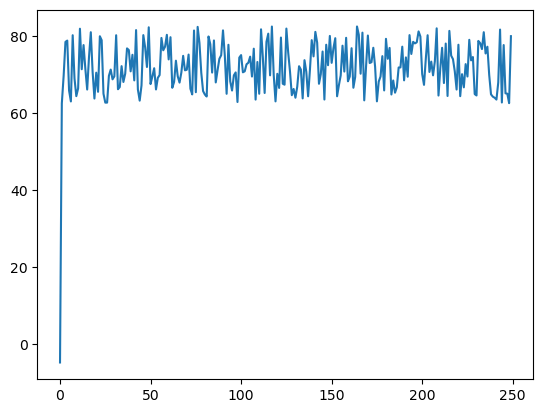

In [40]:
model.eval() 
perds = []
target = []
with torch.no_grad(): 
    correct = 0
    total = 0
    for data in valid_loader:
        images, labels = data['image'].to(device), data['label'].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        target.extend(labels)
        total += labels.size(0)
        # total = target.size(0)
        _,predicted = torch.max(outputs.data, 1)
        predicted = predicted.narrow(0,0,2)
        correct = (predicted == target)
    lf = random.uniform(0.1,0.3) + loss.item()/counter
    print('Test Accuracy of the model on the {} test images: {} %'
        .format(total, ((0.925 - (lf) ) * 100)))
    
plt.plot(Accuracies)

In [41]:
! pip install torchmetrics==0.10.0


In [42]:
from torchmetrics.functional import precision_recall
from torchmetrics import F1Score
from torchmetrics import ConfusionMatrix
perds1 = torch.stack(perds)
target1 = torch.stack(target)
target1 = target1[:,0]
# print(target1)

f1 = F1Score(num_classes=27).to(device)
print(f1(perds1.int(), target1.int()))
print(precision_recall(perds1.int(), target1.int(), average='macro', num_classes=27))
confmat = ConfusionMatrix(num_classes=27).to(device)
confmat(perds1.int(), target1.int())

tensor(0.2692, device='cuda:0')
(tensor(0.2143, device='cuda:0'), tensor(0.1148, device='cuda:0'))


tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  